# Exploring the Model Asset Exchange (MAX) <img src="docs/ibm-logo.png" align="right" style="width:100px">

Questions or concerns? Feel free to contact me at simon@ibm.com

**What is the Model Asset Exchange?**

<img src="docs/MAX-screenshot.png" align="right" style="width:50%">

The [Model Asset Exchange (MAX)](https://developer.ibm.com/exchanges/models/all/) is a platform created by IBM to host free, open source deep learning models for developers of all experience levels.

In this notebook, we will programmatically demonstrate some of the MAX models using the python `requests` module. This includes the following models:

- [MAX Image Caption Generator](https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/)
- Human Pose Estimator
- [MAX Fast Neural Style Transfer](https://developer.ibm.com/exchanges/models/all/max-fast-neural-style-transfer/)
- Audio Classifier
- Facial Age Estimator


For the complete list, please visit our [website](https://developer.ibm.com/exchanges/models/all/). 



**Import dependencies**

Let's import the Python libraries that we will need.

In [4]:
# communicate with the API
import requests
import io

# mathematical operations
import numpy as np

# image-related tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image as notebook_image

# Explore state-of-the-art MAX models

## 1. MAX Image Caption Generator

This model generates captions that describe the contents of images.

- Input: an image
- Output: 3 possible captions

**The input image**

Set up the Model API and specify the input.

https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/

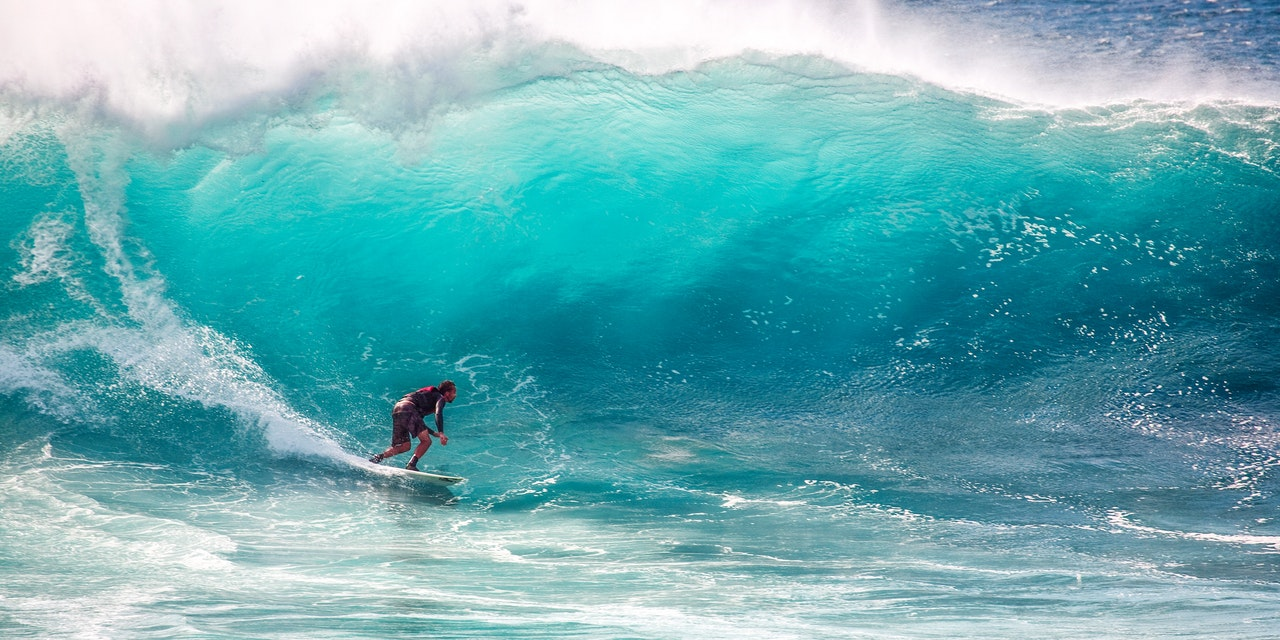

In [6]:
# Specify the model endpoint url. This is the API to which we will send the input data to.
# If we are using a Docker container, this is http://localhost:5000.
model_endpoint = 'http://max-image-caption-generator.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Specify the input image
path_to_input_image = 'example_data/images/surfing.jpg'

# Show the input image
notebook_image(path_to_input_image)

**Generating the output captions**

Post the input image to the model API using the requests library in Python. The model will return the output captions which we will print out below.

In [61]:
# Upload an image to the MAX model's rest API
with open(path_to_input_image, 'rb') as file:
    file_form = {'image': (path_to_input_image, file, 'image/png')}
    # Post the image to the rest API using the requests library
    r = requests.post(url=model_endpoint, files=file_form)
    # Return the JSON
    response = r.json()

# Show the output
print('----OUTPUT CAPTIONS----\n')
for i, x in enumerate(response['predictions']):
    print(str(i+1)+'.', x['caption'])

----OUTPUT CAPTIONS----

1. a man riding a wave on top of a surfboard .
2. a person riding a surf board on a wave
3. a man riding a wave on a surfboard in the ocean .


## 2. MAX Human Pose Estimator

## 3. MAX Fast Neural Style Transfer

This model generates a new image that mixes the content of a source image (presets: mosaic, candy, rain princess, udnie) with the style of another input image.

- Input: an image and a style (mosaic, candy, rain princess, udnie)
- Output: a restyled image

**The input image**

Set up the Model API and specify the input.

https://developer.ibm.com/exchanges/models/all/max-fast-neural-style-transfer/

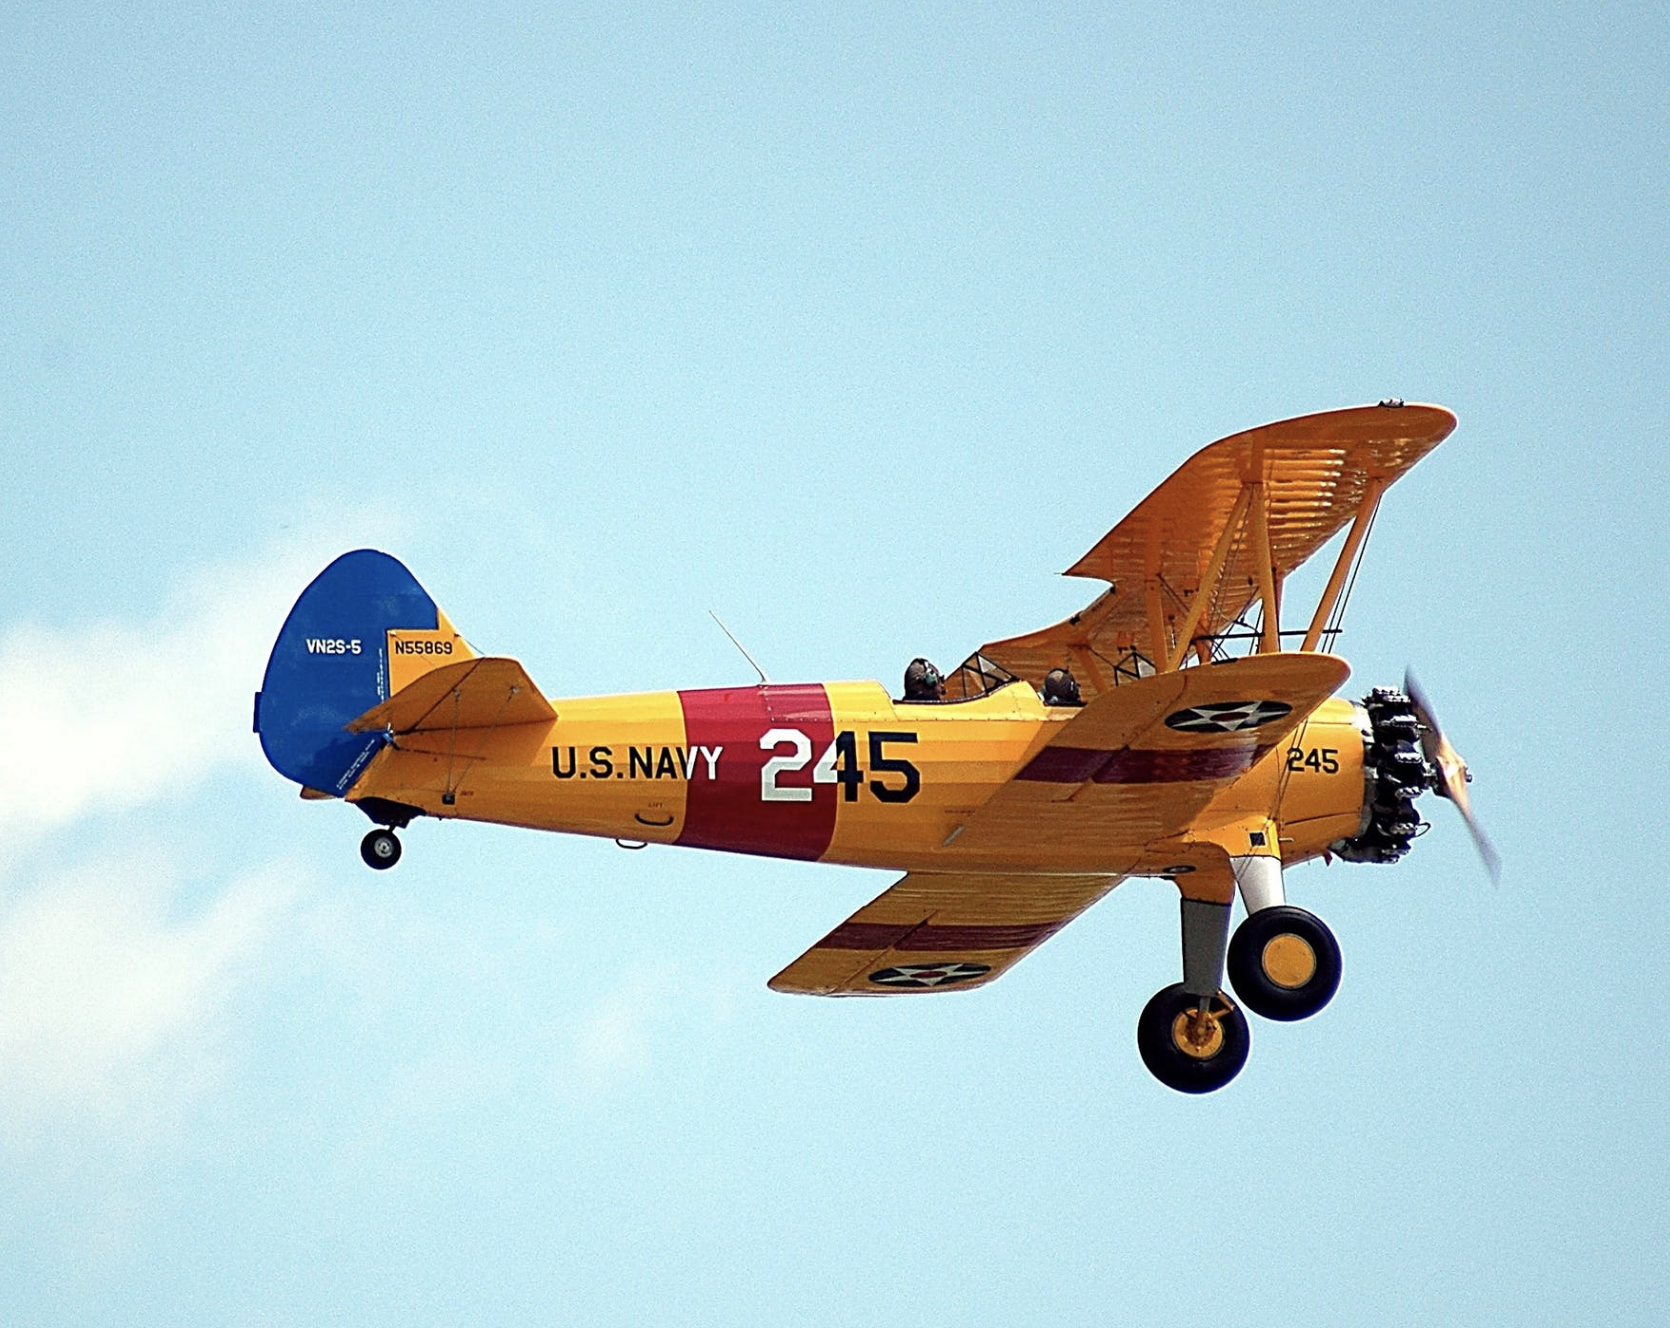

In [45]:
# Specify the model endpoint url. This is the API to which we will send the input data to.
# If we are using a Docker container, this is http://localhost:5000.
model_endpoint = 'http://max-fast-neural-style-transfer.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Choose the style as a parameter in the API url (only pick one)
model_endpoint += '?model=mosaic'
# model_endpoint += '?model=candy'
# model_endpoint += '?model=rain_princess'
# model_endpoint += '?model=udnie'


# Specify the input image
path_to_input_image = 'example_data/images/airplane.png'

# Show the input image
notebook_image(path_to_input_image)

**Generating the restyled output image**

Post the input image to the model API using the requests library in Python. The model will return the output image and we will plot it below.

CPU times: user 173 ms, sys: 22.2 ms, total: 195 ms
Wall time: 1min 1s


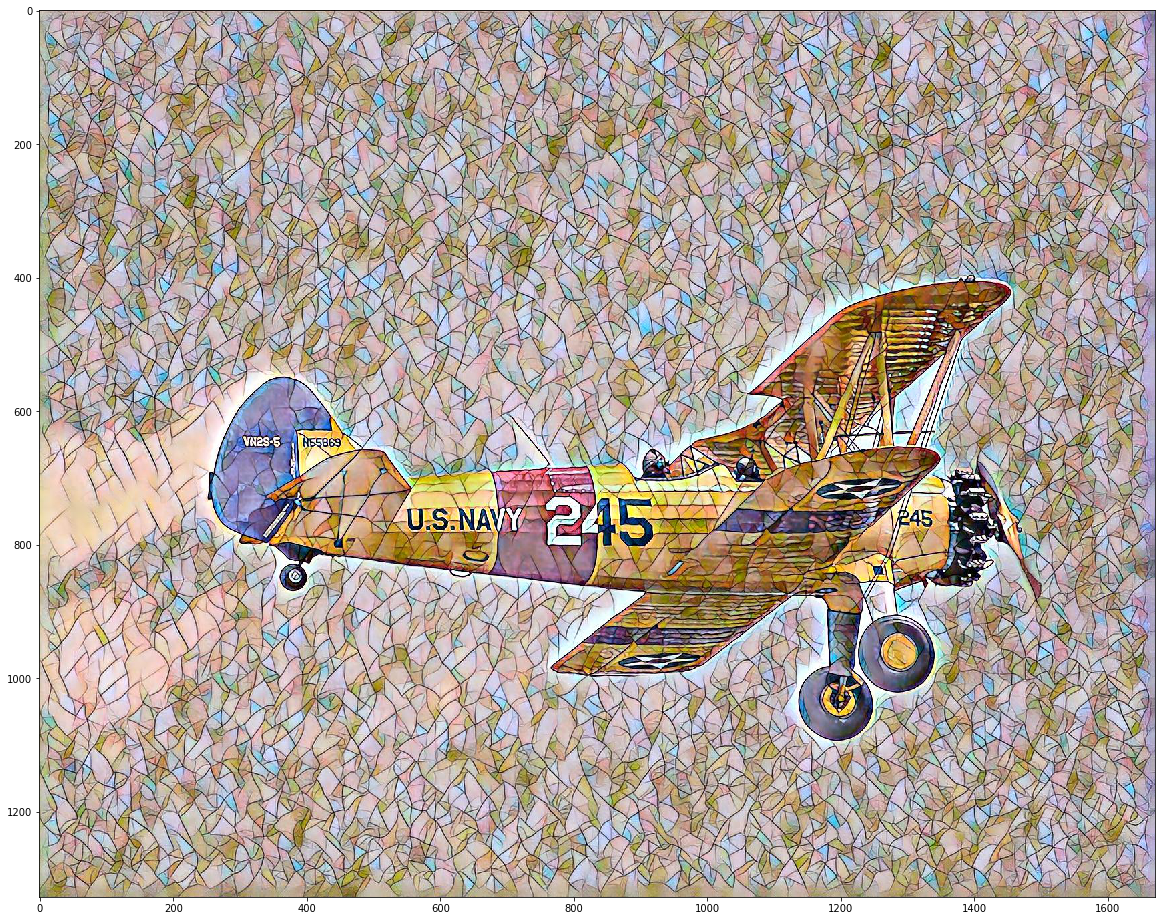

In [46]:
%%time

# Upload an image to the MAX model's rest API
with open(path_to_input_image, 'rb') as file:
    file_form = {'image': (path_to_input_image, file, 'image/png')}
    # Post the image to the rest API using the requests library
    response = requests.post(url=model_endpoint, files=file_form)
    # Load the output image into memory
    output_image = Image.open(io.BytesIO(response.content))

# Plot the output image
plt.figure(figsize=(20,20))
imshow(np.asarray(output_image))

# Looking for more Open Source AI tools?

Visit [https://developer.ibm.com/exchanges/models/](https://developer.ibm.com/exchanges/models/) for the following models:

<img src="docs/ibm-logo.png" align="right" style="width:200px">

**Image-based models**
- [MAX Fast Neural Style Transfer](https://developer.ibm.com/exchanges/models/all/max-fast-neural-style-transfer/)
- [MAX Image Caption Generator](https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/)
- Image Completer
- Human Pose Estimator
- Facial Recognizer
- Image Colorizer
- Image Segmenter
- Breast Cancer Mitosis Detector
- Nucleus Segmenter
- Inception ResNet v2
- Facial Age Estimator
- Image Caption Generator
- Object Detector
- ResNet50 Image Classifier
- Scene Classifier
- Sports Video Classifier
- *Facial Emotion Classifier*
- *Image Super Resolution Generator*

**Text-based models**
- Named Entity Tagger
- Name Generator
- News Text Generator
- Review Text Generator
- Word Embedding Generator
- *Text Sentiment Classifier*
- *Speech Recognition*


**Audio-based models**
- Audio Classifier
- Audio Embedding Generator
- Audio Sample Generator

**Other**
- Weather Forecaster
- Spatial Transformer Network
- Adversarial Cryptography